In [1]:
import os
import pandas as pd

In [2]:
def parse_log(fname):
    # first get the algo type and system type from fname
    fparts = fname.split('/')[-1][8:-4]
    system = fparts[-3:]
    algo = fparts[:-4]
    # now get time from log
    et = 0
    with open(fname, 'r') as fp:
        for line in fp:
            line = line.strip()
            if line.startswith('Elapsed (wall clock) time'):
                tm = line.split('):')[-1].strip()
                tmp = tm.split(':')
                for i in range(len(tmp)):
                    et += 60**i * float(tmp[-(i+1)])
                break
    return {'system': system, 'algo': algo, 'time': et}

In [3]:
parse_log('logs/matmult_acc_gpu.log')

{'system': 'gpu', 'algo': 'acc', 'time': 11.39}

In [6]:
df = pd.DataFrame([parse_log(f'logs/{f}') for f in os.listdir('logs')])

In [7]:
df

,system,algo,time
0,gpu,acc,11.39
1,hub,omp_gpu,15.89
2,gpu,omp_gpu,8.24
3,gpu,cpu,123.36
4,amd,cpu,78.90
5,hub,acc,44.73
6,amd,omp_cpu,2.30
7,hub,cuda,1.57
8,cpu,cpu,118.84
9,amd,hip,0.57


In [8]:
df['speedup'] = df.loc[(df.system == 'hub') & (df.algo == 'cpu'), 'time'].iloc[0] / df.time
df

,system,algo,time,speedup
0,gpu,acc,11.39,10.522388
1,hub,omp_gpu,15.89,7.542480
2,gpu,omp_gpu,8.24,14.544903
3,gpu,cpu,123.36,0.971547
4,amd,cpu,78.90,1.519011
5,hub,acc,44.73,2.679410
6,amd,omp_cpu,2.30,52.108696
7,hub,cuda,1.57,76.337580
8,cpu,cpu,118.84,1.008499
9,amd,hip,0.57,210.263158


In [9]:
df.index = df[['system', 'algo']].agg('_'.join, axis=1)
df

,system,algo,time,speedup
gpu_acc,gpu,acc,11.39,10.522388
hub_omp_gpu,hub,omp_gpu,15.89,7.542480
gpu_omp_gpu,gpu,omp_gpu,8.24,14.544903
gpu_cpu,gpu,cpu,123.36,0.971547
amd_cpu,amd,cpu,78.90,1.519011
hub_acc,hub,acc,44.73,2.679410
amd_omp_cpu,amd,omp_cpu,2.30,52.108696
hub_cuda,hub,cuda,1.57,76.337580
cpu_cpu,cpu,cpu,118.84,1.008499
amd_hip,amd,hip,0.57,210.263158


<AxesSubplot:>

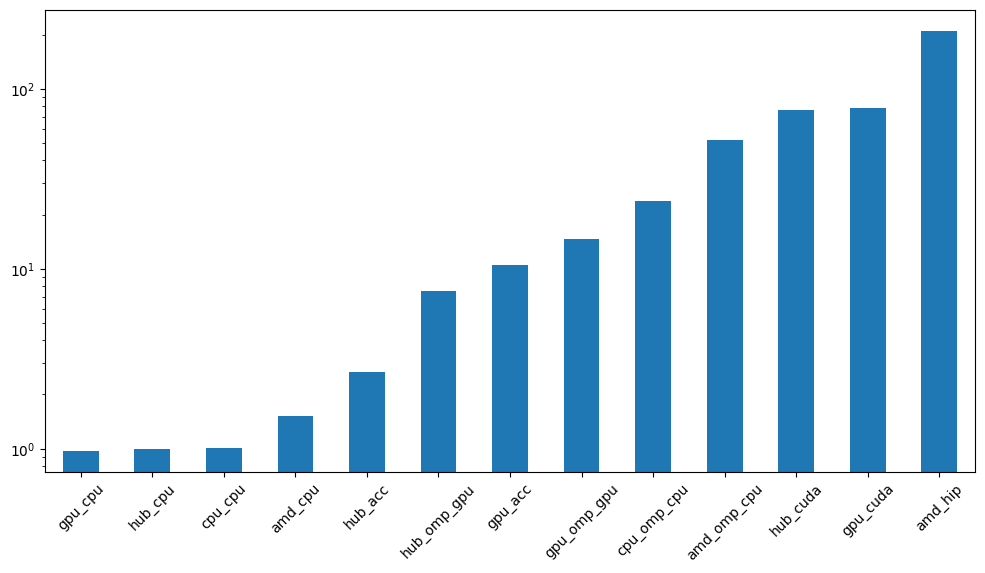

In [10]:
df.speedup.sort_values().plot.bar(rot=45, logy=True, figsize=(12,6))